In [125]:
!pip install fastbook

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [126]:
import fastbook
fastbook.setup_book()

In [127]:
from fastai.vision.all import *

In [128]:
#mporting  necessary libraries
import random

In [129]:
#untaring(getting the path to a specific dataset)--- downloads directly from the net and untars it into a folder
#S3  = 'https://s3.amazonaws.com/fast-ai-', URL = f'{S3}sample/',  MNIST_SAMPLE = f'{URL}mnist_sample.tgz'
#so URLs.MNIST_SAMPLE= 'https://s3.amazonaws.com/fast-ai-sample/mnist_sample.tgz'
path = untar_data(URLs.MNIST_SAMPLE)

In [130]:
#this means the files have been downloaded in the current directry under different subdirectories
path

Path('.')

In [131]:
#DOnt know what this does
#this renders Path('/root/.fastai/data/mnist_sample') as the current directory '.' or base path
#and make  the representation easier
Path.BASE_PATH= path

In [132]:
#subdirectories contained in the actual path
path.ls()

(#3) [Path('train'),Path('labels.csv'),Path('valid')]

In [133]:
#now we can have a look at each directory
(path/'labels.csv').is_file()

True

In [134]:
(path/'train').ls()

(#2) [Path('train/7'),Path('train/3')]

In [135]:
(path/'valid').ls()

(#2) [Path('valid/7'),Path('valid/3')]

In [136]:
#we can see tha the train directory has 2 sub_folders one for 3s and one for 7s
# now we are going to put all the content of the 3s into one list and do the same for 7s
threes = (path/'train'/'3').ls().sorted()
sevens =  (path/'train'/'7').ls().sorted()

In [137]:
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [138]:
sevens

(#6265) [Path('train/7/10002.png'),Path('train/7/1001.png'),Path('train/7/10014.png'),Path('train/7/10019.png'),Path('train/7/10039.png'),Path('train/7/10046.png'),Path('train/7/10050.png'),Path('train/7/10063.png'),Path('train/7/10077.png'),Path('train/7/10086.png')...]

so there are are 6131 training images for 3s and 6265 training images for 7s

In [139]:
#le'S Check how they look
im_10_png = Image.open(threes[1])
im_10_png

In [140]:
im_1000_png = Image.open(threes[1])
im_1000_png

In [141]:
im_1011_png = Image.open(threes[1])
im_1011_png

In [142]:
#because everything is reperesented in computers in terms of numbers and that deep learning algorithms also works well with numbers rather than object as they are, we 
#are now going to transform this images in appropriate forms (numpy arrays- tensors)

im_1011_as_np_array = array(im_1011_png)
im_1011_as_np_array.shape

(28, 28)

In [143]:
im_1011_as_np_array

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 150, 195, 254, 255, 254, 176, 193, 150,  96,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  48, 166, 224, 253, 253, 234, 196, 253, 253, 253, 253, 233,   0

we can see that when  we transform the image into an array we get a 28x28 array of pixel values ranging from 0-255
we can also have this into a Pytorch tensor by applying the tensor function directly 

In [144]:
#the tensor function is a  wrapper for as_tensor of pytorch but can take multiple arrays at once
im_1011_as_pytorch_tensor = tensor(im_1011_png)
im_1011_as_pytorch_tensor.shape

torch.Size([28, 28])

In [145]:
im_1011_as_pytorch_tensor

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 150, 195, 254, 255, 254, 176, 193, 150,  96,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,  48, 166, 224, 253, 253, 234, 196, 253, 253, 253, 253, 2

In [146]:
#for visualising this pixelated frame we can transform the tensor or ndarray in a dataframe and
#color the background according to the value of the content of each cell

#we select just a a part of the image
df = pd.DataFrame(im_1011_as_pytorch_tensor[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient("Greys")

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


we can see that we selected the 
pixel of the top half othe 3 

**BASELINE ALGORITHM**: We check for the average of the pixel values for each ouf our groups  and then we can compate the pixel average of any new image with our baseline and classify accordingly.For every pixel position, we want to compute the average over all the images of the intensity of that pixel.For that it would be great if we had a data structure that could group all the images into one single data structure that can be manipulated at once, that is where tensors get in handy, they are the main data structure in pytorch and deep learning programming, think of them as a way to represent data/images in such a way that applying deep learning will be easy, or as the big brother of nd.array

In [147]:
#for that we first group all the tensors in one list- one for each cathegory so a list of 
#all the 7 tensors and a list of all the 3 tensors

three_tensors = [tensor(Image.open(o)) for o in threes]
seven_tensors = [tensor(Image.open(o)) for o in sevens]

(len(three_tensors),len(seven_tensors))

(6131, 6265)

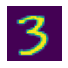

In [148]:
#torch core are basic pytorch functions used in fastai, show_image is one such function which displays a 
#a pytorch tensor containing an image
show_image(three_tensors[1])

In [149]:
#because want to calculate the average value of a pixel overall (considering all the images of a specific category) we will first of all 
#To do this we first combine all the images in this list into a single three-dimensional tensor.The most common way to describe such a tensor is to call it a rank-3 tensor. 
#We often need to stack up individual tensors in a collection into a single tensor. Pytorch has an inbuilt function to do just this. because some arithmetic
#operations in pytorch can only be performed on floats , we cast everything into float, pixels values are expected to be between 0 and 1 when floats so we devide everything by 255
#t


stacked_threes = torch.stack(three_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255


In [150]:
#checking the shape of this single tensor now
stacked_threes.shape

torch.Size([6131, 28, 28])

we can see it's now a  rank-3 tensor with 6131 in depth and 28 x28 in surface think of it as a cube.Perhaps the most important attribute of a tensor is its shape. This tells you the length of each axis. In this case, we can see that we have 6,131 images, each of size 28×28 pixels. There is nothing specifically about this tensor that says that the first axis is the number of images, the second is the height, and the third is the width—the semantics of a tensor are entirely up to us, and how we construct it. As far as PyTorch is concerned, it is just a bunch of numbers in memory. the length of a tensor's shape is its rank

In [151]:
#the advantage of the rank-n tensor is that although it is one single bundle we can still access individual tensors
stacked_threes[0]
stacked_threes[0].shape

torch.Size([28, 28])

In [152]:
#now we calculate the mean of all the pixels

mean_threes = stacked_threes.mean(0)
mean_sevens = stacked_sevens.mean(0)

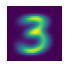

In [153]:
#don't forget that show_image is a pytorch function that can show images stored as tensors
show_image(mean_threes)

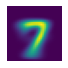

In [154]:
#don't forget that show_image is a pytorch function that can show images stored as tensors
show_image(mean_sevens)

In [155]:
#let'spick and arbitrary 3 and check it's distance from our mean 3

random_3 = random.choice(stacked_threes)
random_to_mean_abs = (random_3-mean_threes).abs().mean()
random_to_mean_sqrt = ((random_3-mean_threes)**2).mean().sqrt()
(random_to_mean_abs,random_to_mean_sqrt)

(tensor(0.1207), tensor(0.2173))

In [156]:
#let's check it against 7
random_to_mean7_abs = (random_3-mean_sevens).abs().mean()
random_to_mean7_sqrt = ((random_3-mean_sevens)**2).mean().sqrt()
(random_to_mean7_abs,random_to_mean7_sqrt)

(tensor(0.1617), tensor(0.3079))

In Both cases our three and the mean 3 is less thatn the distance to the ideal 7 so that the  baseline algorithm would yield a good result in this case , but keep  in mind that there might be images of 3 who are closer to the mean of 7s that that of 3s

In [157]:
#Pytorch has both of this function as loss function in its module torch.nn.functional ---- > loss function measures the discrepancy between the real value and the predicted value
#the lower the loss function the better, now this is just for one image but we can calculate the loss for a bunch at once---tensor

In [158]:
from torch import nn
#takes as input a specific tensor and the target tensor
#L1 norm = mean absolute value
l1_3 = nn.functional.l1_loss(random_3,mean_threes)
mse_3 =nn.functional.mse_loss(random_3,mean_threes)
(l1_3,mse_3)

(tensor(0.1207), tensor(0.0472))

In [159]:
l1_7 = nn.functional.l1_loss(random_3,mean_sevens)
mse_7 =nn.functional.mse_loss(random_3,mean_sevens)
(l1_7,mse_7)

(tensor(0.1617), tensor(0.0948))

The main difference between the L1 norm and the mse is that the latter will penalize bigger mistakes more heavily than the former.

NumPy is the most widely used library for scientific and numeric programming in Python. It provides very similar functionality and a very similar API to that provided by PyTorch; however, it does not support using the GPU or calculating gradients, which are both critical for deep learning. Therefore, in this book we will generally use PyTorch tensors instead of NumPy arrays, where possible.

Python is slow compared to many languages. Anything fast in Python, NumPy, or PyTorch is likely to be a wrapper for a compiled object written (and optimized) in another language—specifically C. In fact, NumPy arrays and PyTorch tensors can finish computations many thousands of times faster than using pure Python.---> so they are most likely compiled C objects.

A PyTorch tensor is nearly the same thing as a NumPy array, but with an additional restriction that unlocks some additional capabilities. It's the same in that it, too, is a multidimensional table of data, with all items of the same type.However, the restriction is that a tensor cannot use just any old type—it has to use a single basic numeric type for all components. For example, a PyTorch tensor cannot be jagged. It is always a regularly shaped multidimensional rectangular structure.To take advantage of its speed while programming in Python, try to avoid as much as possible writing loops, and replace them by commands that work directly on arrays or tensors.Perhaps the most important new coding skill for a Python programmer to learn is how to effectively use the array/tensor APIs. We will be showing lots more tricks later in this book, but here's a summary of the key things you need to know for now.
The vast majority of methods and operators supported by NumPy on these structures are also supported by PyTorch, but PyTorch tensors have additional capabilities. One major capability is that these structures can live on the GPU, in which case their computation will be optimized for the GPU and can run much faster

In [160]:
stacked_threes

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0., 

In [161]:
#This is how you can index a tensor, all tensors in the 3D tensors, the first till third line of each tensor and thier first till third column,
#now you can watch each of them by indexing them further
stacked_threes[:,1:3,1:3][0]

#all other normal numpy operation can be done on a tensor or a group of tensor(higher order)

tensor([[0., 0.],
        [0., 0.]])

now to judge the quality of a model we must define and metric(quantity) whose value will let us know how good it is.a metric is a number that is calculated based on the predictions of our model, and the correct labels in our dataset.For instance, we could use either of the functions we saw in the previous section, mean squared error, or mean absolute error, and take the average of them over the whole dataset. However, neither of these are numbers that are very understandable to most people; in practice, we normally use accuracy as the metric for classification models.

nomarly the metric is calculated over a validation set in order to avoid overfitting

In [162]:
#let's stack the validation set images to in one tensor
path.ls()

(#3) [Path('train'),Path('labels.csv'),Path('valid')]

In [163]:
(path/'valid').ls()

(#2) [Path('valid/7'),Path('valid/3')]

In [164]:
validation_set_7 =[ tensor(Image.open(o)).float()/255 for o in (path/'valid/7').ls()]
validation_set_3 = [ tensor(Image.open(o)).float()/255 for o in (path/'valid/3').ls()]

In [165]:
valid_tensor_7 = torch.stack(validation_set_7)
valid_tensor_3 = torch.stack(validation_set_3)

In [166]:
(valid_tensor_3.shape,valid_tensor_7.shape)

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [167]:
def mnist_distance(a,b) :
  #nn.functional.l1_loss(a,b)
  return (a-b).abs().mean((-1,-2))
#the (-1,-2) tells pytorch to execute the mean over the last two axis of our tensor that is the x and y of the image and not consider along the length of the tensor
# that is why when you use an inbult nn.functional function it does not consider this pecularity and calculates the mean also over the length axis of the tensor and gives a scalar
#tensor of dim = 0
mnist_distance(random_3,mean_threes)

tensor(0.1207)

In [168]:
#now we want to calculate the distance for all the validation tensor at once, this is where pytorch shines using broadcasting,
#somehow broadcasting doesn't work with inbuild nn.funcitonal functions
valid_3_dist = mnist_distance(valid_tensor_3,mean_threes)
valid_3_dist, valid_3_dist.shape

(tensor([0.1238, 0.1378, 0.1258,  ..., 0.1108, 0.1303, 0.1120]),
 torch.Size([1010]))

In [169]:
valid_7_dist = mnist_distance(valid_tensor_7,mean_sevens)
valid_7_dist, valid_7_dist.shape

(tensor([0.0877, 0.1051, 0.1079,  ..., 0.1188, 0.1356, 0.0997]),
 torch.Size([1028]))

There are a couple of important points about how broadcasting is implemented, which make it valuable not just for expressivity but also for performance:

PyTorch doesn't actually copy mean3 1,010 times. It pretends it were a tensor of that shape, but doesn't actually allocate any additional memory
It does the whole calculation in C (or, if you're using a GPU, in CUDA, the equivalent of C on the GPU), tens of thousands of times faster than pure Python (up to millions of times faster on a GPU!).
This is true of all broadcasting and elementwise operations and functions done in PyTorch. It's the most important technique for you to know to create efficient PyTorch code.

In [170]:
#now we create a function that is going to tell us if an image is a 3 or not

def is_3(image):
  return mnist_distance(image, mean_threes) < mnist_distance(image, mean_sevens)


In [171]:
#let's test it on a random_3 of the training set

is_3(random.choice(stacked_threes))

tensor(True)

In [172]:
#now let's use it against our validation set
is_3(valid_tensor_3)

tensor([True, True, True,  ..., True, True, True])

In [173]:
is_3(valid_tensor_7)

tensor([False, False, False,  ..., False, False, False])

In [174]:
#let'S define our metric based on this ---ACCURACY

accuracy_3s = is_3(valid_tensor_3).float().mean()
accuracy_7s = 1 - is_3(valid_tensor_7).float().mean()

accuracy_3s , accuracy_7s,(accuracy_3s+accuracy_7s)/2


(tensor(0.9168), tensor(0.9854), tensor(0.9511))

**so  our baseline model has an accuracy of 0.9511, we are getting over 90% accuracy on both 3s and 7s**

To do better, perhaps it is time to try a system that does some real learning—that is, that can automatically modify itself to improve its performance. In other words, it's time to talk about the training process, and SGD.

**STOCHASTIC GRADIENT DESCENT(SGD)**

Suppose we arrange for some automatic means of testing the effectiveness of any current weight assignment in terms of actual performance and provide a mechanism for altering the weight assignment so as to maximize the performance. We need not go into the details of such a procedure to see that it could be made entirely automatic and to see that a machine so programmed would "learn" from its experience.this is the key to allowing us to have a model that can get better and better—that can learn:But our pixel similarity approach does not really do this. We do not have any kind of weight assignment, or any way of improving based on testing the effectiveness of a weight assignment. In other words, we can't really improve our pixel similarity approach by modifying a set of parameters.Instead of trying to find the similarity between an image and an "ideal image," we could instead look at each individual pixel and come up with a set of weights for each one, such that the highest weights are associated with those pixels most likely to be black for a particular category. For instance, pixels toward the bottom right are not very likely to be activated for a 7, so they should have a low weight for a 7, but they are likely to be activated for an 8, so they should have a high weight for an 8.


So look at each pixel--> what is the probability that this particular pixel has to be relevant for a specific digit and we assign it the appropriate weight and we change this weights untill the error is minimal

To be more specific, here are the steps that we are going to require, to turn this function into a machine learning classifier:


1.  Initialize the weights
2.   For each image, use these weights to predict whether it appears to be a 3 or a 7.

1.  Based on these predictions, calculate how good the model is (its loss).
2.   Calculate the gradient, which measures for each weight, how changing that weight would change the loss

1.   Step (that is, change) all the weights based on that calculation.
2.   Go back to the step 2, and repeat the process.

1.   Iterate until you decide to stop the training process (for instance, because the model is good enough or you don't want to wait any longer).


These seven steps, illustrated in <>, are the key to the training of all deep learning models. That deep learning turns out to rely entirely on these steps is extremely surprising and counterintuitive. It's amazing that this process can solve such complex problems. But, as you'll see, it really does!





In [175]:
#id gradient_descent
#caption The gradient descent process
#alt Graph showing the steps for Gradient Descent
import graphviz as g
t=g.Graph('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')
print(t)

graph "
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
" {
}




1.   We initialise the parameters to random values since our algorithm is going to improve it anyways
2.   Loss : We need a function that will return the number that is small if the performance of the model is good 
1.   find out in which direction and by how much to change the weight untill we get a satisfactory weight overall(low lost function), the best way to do it is by using gradients
2.  decide when to stop---e.g untill accuracy start getting worse or we run out of time.

the procedure of gradient descent is the same always and is not changing the only way we can improve it is by adjusting the step

For instance, the derivative of the quadratic function at the value 3 tells us how rapidly the function changes at the value 3. More specifically, you may recall that gradient is defined as rise/run, that is, the change in the value of the function, divided by the change in the value of the parameter. When we know how our function will change, then we know what we need to do to make it smaller.

One important thing to be aware of is that our function has lots of weights that we need to adjust, so when we calculate the derivative we won't get back one number, but lots of them—a gradient for every weight. But there is nothing mathematically tricky here; you can calculate the derivative with respect to one weight, and treat all the other ones as constant


Amazingly enough, PyTorch is able to automatically compute the derivative of nearly any function! What's more, it does it very fast. Most of the time, it will be at least as fast as any derivative function that you can create by hand. Let's see an example.

But in deep learning, "gradients" usually means the value of a function's derivative at a particular argument value.PyTorch API also puts the focus on the argument, not the function you're actually computing the gradients of. It may feel backwards at first, but it's just a different perspective.

backpropagation, which is the name given to the process of calculating the derivative of each layer.This is called the "backward pass" of the network, as opposed to the "forward pass," which is where the activations are calculated. Life would probably be easier if backward was just called calculate_grad, but deep learning folks really do like to add jargon everywhere they can!



***Understanding SGD***

In [176]:
def f(x) : return x**2

In [177]:
#here is the standard procedure for calculating the gradient at a specific point 
#in pytorch when we want to calculate the  gradient at a specific point (value of the gradient)
value =3.
#1- we stick the gradient to that variable
xt = tensor(value).requires_grad_() #----  variable : find gradient at point with value 3
yt = f(xt) # apply the request to the function
yt.backward()  # calculat it
xt.grad


tensor(6.)

The gradients only tell us the slope of our function, they don't actually tell us exactly how far to adjust the parameters. But it gives us some idea of how far; if the slope is very large, then that may suggest that we have more adjustments to do, whereas if the slope is very small, that may suggest that we are close to the optimal value.

**Stepping With a Learning Rate¶**

Deciding how to change our parameters based on the values of the gradients is an important part of the deep learning process. Nearly all approaches start with the basic idea of multiplying the gradient by some small number, called the learning rate (LR)
The learning rate is often a number between 0.001 and 0.1, although it could be anything. Often, people select a learning rate just by trying a few, and finding which results in the best model after training (we'll show you a better approach later in this book, called the learning rate finder)



In [178]:
#once the learning rate has been chosen we adjust our weight by using a simple function

#w = w -lr* gr(w)

#this is nknown as the optimizer step --- parameter update This allows us to adjust the parameter in the direction of the slope 
#by increasing the parameter when the slope is negative and decreasing the parameter when the slope is positive.
# We want to adjust our parameters in the direction of the slope because our goal in deep learning is to minimize the loss.
#If the learning rate is too high, it may also "bounce" around, rather than actually diverging;
#this has the result of taking many steps to train successfully.

In [179]:
#example ---- > let's fint he best quadratic function that approximates a certain velocity behavior defined by


time = torch.arange(0,20).float();
time
#randn return a set of n random number from a normal distribution
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1 

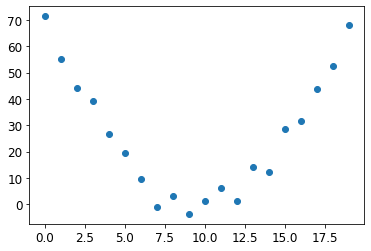

In [180]:
plt.scatter(time,speed)

In [181]:
#we wan to distinguish between the function's input and its parameters, the values that define which quadratic we're trying

def f(t, params):
  #t = input params =parameter
  a,b,c= params
  return a*(t**2)+(b*t)+c

  #since every quadratic function is fully defined by the three parameters a, b, and c. Thus, to find the best quadratic function, we only need to find the best values for a, b, and c.
  #We need to define first what we mean by "best." We define this precisely by choosing a loss function,For continuous data, it's common to use mean squared error:

  def mse(preds, targets):
    return ((preds-targets)**2).mean()

In [182]:
#step 1 
#initialize the parameters randomly a,b,c
##reminds pytorch that they will be requiring the gradient at this weights
params = torch.randn(3).requires_grad_()
orig_params=params.clone()

In [183]:
#step 2 calculate the prediction

preds=f(time,params)

In [184]:
def show_preds(preds,ax=None):
 if ax is None: ax=plt.subplots()[1]
 ax.scatter(time,speed)
 ax.scatter(time,to_np(preds),color ='red')
 ax.set_ylim(-300,100)

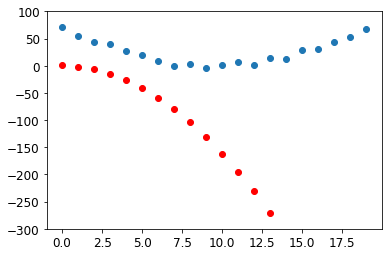

In [185]:
show_preds(preds)

In [186]:
#calculate the loss

loss = mse(preds,speed)
loss

TensorBase(84908.7344, grad_fn=<AliasBackward0>)

In [187]:
#calculate the gradient of the loss function according to the parameters
loss.backward()
params.grad

tensor([-97354.4844,  -6253.1025,   -447.8495])

In [188]:
params.grad*1e-5

tensor([-0.9735, -0.0625, -0.0045])

In [189]:
#let's  use these gradients to improve our parameters, let's pic 1e-5 as learning rate
params

tensor([-1.5500, -0.7509,  0.8372], requires_grad=True)

In [190]:
#step the weights

lr= 1e-5
params.data -= lr*params.grad.data
params.grad = None

In [191]:
#calculate the loss again
preds = f(time,params)
mse(preds,speed)

TensorBase(16622.5430, grad_fn=<AliasBackward0>)

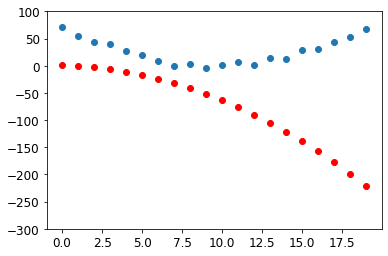

In [192]:
show_preds(preds)

In [193]:
#we can see indeed that the function draws closer to our original function

def apply_step (params, prn=True):
  preds = f(time, params)
  loss = mse(preds,speed)
  loss.backward()
  params.data -=lr*params.grad.data
  params.grad = None
  if prn: print(loss.item()) 
  return preds

In [194]:
for i in range(10):apply_step(params)

16622.54296875
3700.715576171875
1255.5068359375
792.7952880859375
705.232666015625
688.6595458984375
685.52001953125
684.9224853515625
684.8057250976562
684.7802124023438


In [195]:
params = torch.randn(3).requires_grad_()
orig_params=params.clone()
params=orig_params.detach().requires_grad_()

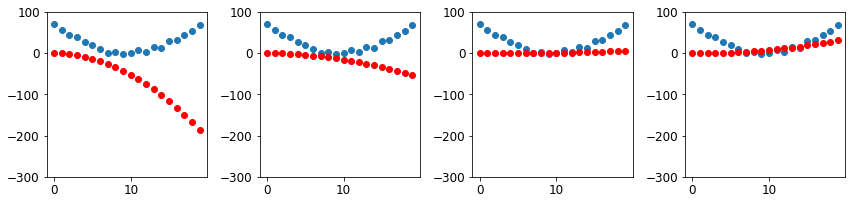

In [196]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: 
  show_preds(apply_step(params,False),ax)
plt.tight_layout()

In [197]:
#stop
#we decided to stop arbitrarily after 10 epochs, in practice, we would watch the training and validation losses and our metrics to decide when to stop

To summarize, at the beginning, the weights of our model can be random (training from scratch) or come from a pretrained model (transfer learning). In the first case, the output we will get from our inputs won't have anything to do with what we want, and even in the second case, it's very likely the pretrained model won't be very good at the specific task we are targeting. So the model will need to learn better weights.

We begin by comparing the outputs the model gives us with our targets (we have labeled data, so we know what result the model should give) using a loss function, which returns a number that we want to make as low as possible by improving our weights.


To do this, we take a few data items (such as images) from the training set and feed them to our model. We compare the corresponding targets using our loss function, and the score we get tells us how wrong our predictions were. We then change the weights a little bit to make it slightly better.


Let's consider an analogy. Imagine you are lost in the mountains with your car parked at the lowest point. To find your way back to it, you might wander in a random direction, but that probably wouldn't help much. Since you know your vehicle is at the lowest point, you would be better off going downhill. By always taking a step in the direction of the steepest downward slope, you should eventually arrive at your destination.

We use the magnitude of the gradient (i.e., the steepness of the slope) to tell us how big a step to take; specifically, we multiply the gradient by a number we choose called the learning rate to decide on the step size.



**The MNIST Loss Function¶**

We already have our independent variables x—these are the images themselves. We'll concatenate them all into a single tensor, and also change them from a list of matrices (a rank-3 tensor) to a list of vectors (a rank-2 tensor). We can do this using view, which is a PyTorch method that changes the shape of a tensor without changing its contents.

In [198]:
#that means we explode every image  from matrix to vector of length(28*28), so all the pixels in one long array
#reshape is an another option
train_x = torch.cat([stacked_threes,stacked_sevens]).view(-1,28*28)

In [199]:
train_x.shape[0] == stacked_threes.shape[0] + stacked_sevens.shape[0]

True

In [200]:
train_x.shape[1] == stacked_threes.shape[1]*stacked_threes.shape[2]

True

In [201]:
#we create the labels for each image 1 for 3s and 0 for 7s

train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_x.shape, train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [202]:
#we create our training dataset which to each image associates a label
dset = list(zip(train_x,train_y))
x,y = dset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

In [203]:
#we create our validation dataset in the same format

valid_x = torch.cat([valid_tensor_3,valid_tensor_7]).view(-1,28*28)
valid_y = tensor([1]*len(validation_set_3) + [0]*len(validation_set_7)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))


In [204]:
#step-1 initialising the parameters

def init_params(size, std=1.0):
  return (torch.randn(size)*std).requires_grad_()

In [205]:
#defining the weights for one single image??
weights = init_params((28*28,1))

In [206]:
bias = init_params(1)

In [207]:
#we can now calculate the prediction of one single image
#w*X+b
#In neural networks, the w in the equation y=w*x+b is called the weights, and the b is called the bias. Together, the weights and bias make up the parameters.
(train_x[0]*weights.T).sum()+bias

tensor([19.6227], grad_fn=<AddBackward0>)

In [208]:
#while we could use python  for loop to calculate the prediction for all the image, that would be very slow because python loops don't run on GPU:nd because Python is a slow language for loops in general,
#we need to represent as much of the computation in a model as possible using higher-level functions.
#Matrix Multiplication is the most important mathematical operation in deep learning.
#In Python, matrix multiplication is represented with the @ operator. Let's try it:


def linear1(xb):
  return xb@weights + bias


In [209]:
#this takes the whole training tensor made up of 12396 vectors of 784 representing each an image and multiplies it with the weight vector --- broadcasting
#and adds for each the bias, we get a rank-2 tensor as well with the prediction for each images
preds = linear1(train_x)
preds

tensor([[19.6227],
        [12.4130],
        [ 0.1864],
        ...,
        [-0.6078],
        [ 6.4030],
        [ 5.1042]], grad_fn=<AddBackward0>)

In [210]:
#checking our accuracy

correctly_predicted = (preds>0.0).float() == train_y
correctly_predicted

tensor([[ True],
        [ True],
        [ True],
        ...,
        [ True],
        [False],
        [False]])

In [211]:
#accuracy
correctly_predicted.float().mean()
#our accuracy is 0.5--- > which is basically  equal to a random experiment

tensor(0.4875)

In [212]:
#now we need a loss function to calculate the gradient as they measure how this loss function changes if we tweak the weights
#The gradient of a function is its slope, or its steepness, which can be defined as rise over run—that is, how much the value of the function goes up or down, divided by how much we changed the input. We can write this in mathematically as: (y_new - y_old) / (x_new - x_old).
#A very small change in the value of a weight will often not actually change the accuracy at all. This means it is not useful to use accuracy as a loss function—if we do, most of the time our gradients will actually be 0, and the model will not be able to learn from that number.
#In mathematical terms, accuracy is a function that is constant almost everywhere (except at the threshold, 0.5), so its derivative is nil almost everywhere (and infinity at the threshold). This then gives gradients that are 0 or infinite, which are useless for updating the model.

The loss function receives not the images themselves, but the predictions from the model. Let's make one argument, prds, of values between 0 and 1, where each value is the prediction that an image is a 3. It is a vector (i.e., a rank-1 tensor), indexed over the images.The purpose of the loss function is to measure the difference between predicted values and the true values — that is, the targets (aka labels). Let's make another argument, trgts, with values of 0 or 1 which tells whether an image actually is a 3 or not. It is also a vector (i.e., another rank-1 tensor), indexed over the images.

One problem with mnist_loss as currently defined is that it assumes that predictions are always between 0 and 1. We need to ensure, then, that this is actually the case! As it happens, there is a function that does exactly that—let's take a look.The sigmoid function always outputs a number between 0 and 1. It's defined as follows:Pytorch defines an accelerated version for us, so we don’t really need our own. This is an important function in deep learning, since we often want to ensure values are between 0 and 1. This is what it looks like:

**The key difference is that the metric is to drive human understanding and the loss is to drive automated learning**
To drive automated learning, the loss must be a function that has a meaningful derivative. It can't have big flat sections and large jumps, but instead must be reasonably smooth. This is why we designed a loss function that would respond to small changes in confidence level.Metrics, on the other hand, are the numbers that we really care about. These are the values that are printed at the end of each epoch that tell us how our model is really doing. It is important that we learn to focus on these metrics, rather than the loss, when judging the performance of a model.


Now that we have a loss function that is suitable for driving SGD, we can consider some of the details involved in the next phase of the learning process, which is to change or update the weights based on the gradients--- this is the optimization step





So instead we take a compromise between the two: we calculate the average loss for a few data items at a time. This is called a mini-batch. The number of data items in the mini-batch is called the batch size. so we take a couple of images like 20 of them we calculate the loss for each of thema and average it over 20
A larger batch size means that you will get a more accurate and stable estimate of your dataset's gradients from the loss function, but it will take longer, and you will process fewer mini-batches per epoch.  an Epoch is a complete run through of the dataset.Choosing a good batch size is one of the decisions you need to make as a deep learning practitioner to train your model quickly and accurately. We will talk about how to make this choice throughout this book.Another good reason for using mini-batches rather than calculating the gradient on individual data items is that, in practice, we nearly always do our training on an accelerator such as a GPU. These accelerators only perform well if they have lots of work to do at a time, so it's helpful if we can give them lots of data items to work on.

Rather than simply enumerating our dataset in order for every epoch, instead what we normally do is randomly shuffle it on every epoch, before we create mini-batches. PyTorch and fastai provide a class that will do the shuffling and mini-batch collation for you, called DataLoader.

A DataLoader can take any Python collection and turn it into an iterator over mini-batches, like so:

In [213]:
coll = range(15)
dl = DataLoader(coll, batch_size=5, shuffle = True)
list(dl)

[tensor([ 0,  7,  4,  5, 11]),
 tensor([ 9,  3,  8, 14,  6]),
 tensor([12,  2,  1, 10, 13])]

A collection that contains tuples of independent and dependent variables is known in PyTorch as a Dataset.

In [214]:
#dataset is a collection of tuples of tensors in one tuple we have an image and its label
dset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0

In [215]:
#Puting it all together

#itialising weights 
weights = init_params((28*28,1))
bias= init_params(1)

In [216]:
def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean()#create a DataLoader for training set --- for creating mini-batches out of dataset
dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [217]:
#create DataLoader  for validation set

valid_dl = DataLoader(valid_dset,batch_size=256)

In [218]:
#let's create a mini-batch of size 4 for testing

batch_4 = train_x[:4]
batch_4.shape

torch.Size([4, 784])

In [219]:
#let's perform predictions on our mini patch
#it's gonna return the prediction for each of the images in the batch
preds = linear1(batch_4)
preds
#shouldn't we make sure that the predictions are between 0 and 1 ? by using the sigmoid?

tensor([[-4.4922],
        [-6.5688],
        [-7.9150],
        [ 1.6136]], grad_fn=<AddBackward0>)

In [220]:
#squishes the function between 0 and 1
def sigmoid(x): return 1/(1+torch.exp(-x))

def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [221]:
#calculate the average loss for this mini-batch

loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.7883, grad_fn=<MeanBackward0>)

In [222]:
#calculate the gradients for all of the pixels for all of the images of the mini_batch
#we can do this because when initialising the parameters we already indicated that they would require gradient calculation later
loss.backward()
weights.grad.shape, weights.grad.mean(),bias.grad

(torch.Size([784, 1]), tensor(-0.0065), tensor([-0.0378]))

In [223]:
#puting all in a function

def calc_grad (xb,yb,model):
  preds = model(xb)
  loss = mnist_loss(preds,yb)
  loss.backward()

In [224]:
calc_grad(batch_4,train_y[:4],linear1)
weights.grad.mean(), bias.grad

(tensor(-0.0131), tensor([-0.0756]))

In [225]:
#we have to set the the current gradient to 0 first before calculating the gradients again otherwise they
#will be added up to the existing ones
# inplace operations in pytorch finish with and  _
weights.grad.zero_()
bias.grad.zero_()
#now we have to update our weights with the appropriate learning rate

tensor([0.])

In [226]:
#here is the training for an epoch
#one weight vector for a batch
#params are weights and bias (initial)
def train_epoch(model, lr, params):
  #for every batch in the data loader
  for(xb,yb) in dl:
    calc_grad(xb,yb,model)
    for p in params:
      p.data -=p.grad*lr
      p.grad.zero_()

def batch_accuracy(xb,yb):
  preds = xb.sigmoid()
  correct = (preds>0.5).float() == yb
  return correct.float().mean()
#put all the ebatches together
def validate_epoch(model):
  accs= [batch_accuracy(model(xb),yb) for xb,yb in valid_dl]
  return round(torch.stack(accs).mean().item(),4)


In [227]:
validate_epoch(linear1)

0.4734

In [228]:
#choose the learning rate
lr=1.
#initialise the weights and bias
params=weights,bias
#train for a full epoch == modify the the weights once for all the batches of an epoch
train_epoch(linear1,lr,params)
#check how good the model is - against the validation dataset at this level after having modified all the weights
validate_epoch(linear1)

0.5945

In [229]:
#now repeat this over an over --- many epoch --at every epoch , shuffle and redistribute the batches
#for now simply repeat on the same batch distribution

for i in range(20):
  train_epoch(linear1,lr,params)
  print(validate_epoch(linear1), end=" ")

0.7996 0.8816 0.9104 0.9285 0.9363 0.9461 0.9495 0.9529 0.9559 0.9578 0.9593 0.9603 0.9603 0.9612 0.9632 0.9632 0.9642 0.9647 0.9661 0.9666 

In [230]:
#now we create and OPTIMIZER --- which is simply a fancy name for function that handles the SGD for us

The first thing we can do is replace our linear1 function with PyTorch's nn.Linear module. A module is an object of a class that inherits from the PyTorch nn.Module class. Objects of this class behave identically to standard Python functions, in that you can call them using parentheses and they will return the activations of a model.

nn.Linear does the same thing as our init_params and linear together. It contains both the weights and biases in a single class

so nn.Linear initialises the weights and bias and creates a linear model to approximate our image, so there is a linear function between an image and it's class and tweaking the parameters will help us approximate that function so we start by randomly attributing the weights


In [231]:
linear_model = nn.Linear(28*28,1)
w,b =linear_model.parameters()
w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [232]:
class BasicOptimzer:
  def __init__(self,params,lr):
    self.params, self.lr  = list(params),lr
  def step(self,*args,**kwargs):
    for p in self.params :
      p.data -= p.grad.data * self.lr
  def zero_grad(self,*args,**kwargs):
    for p in self.params: p.grad = None

In [233]:
#now we can create an optimzer and use it in our epoch training
#of course fastai and pytorch have inbuilt optmizers that we can use ---- > basically calculat the step, adjust the weights and reinitialises them for the next step
optimizer = BasicOptimzer(linear_model.parameters(),lr)

In [234]:
#we redefine train_epoch to use the optimizer
def train_epoch(model):
  #for every batch in the data loader
  for(xb,yb) in dl:
    calc_grad(xb,yb,model)
    optimizer.step()
    optimizer.zero_grad()

In [235]:
validate_epoch(linear_model)

0.5465

In [236]:
#define a general function that is going to train the model over a given number of epochs
def train_model(model, epochs):
  for i in range(epochs):
    train_epoch(model)
    print(validate_epoch(model), end=' ')

In [237]:
train_model(linear_model,20)

0.4932 0.7725 0.8594 0.9189 0.9365 0.9512 0.9585 0.9638 0.9663 0.9677 0.9702 0.9721 0.9741 0.9755 0.976 0.9765 0.978 0.978 0.978 0.9785 

In [238]:
#fastai also provides a function for training the model out of the box so that we don't need to 
#rewrite them, for that we need a data loader 
#A Data loader takes the training set as well as the validation set  and create minibatches
#dl = dl = DataLoader(dset, batch_size=256)------->
#valid_dl = DataLoader(valid_dset,batch_size=256)------>
#valid_x = torch.cat([valid_tensor_3,valid_tensor_7]).view(-1,28*28)
#valid_y = tensor([1]*len(validation_set_3) + [0]*len(validation_set_7)).unsqueeze(1)
#valid_dset = list(zip(valid_x,valid_y))
#dset = list(zip(train_x,train_y))
#beware DataLoaders takes the training and validation and DataLoader just one and creates batches
dls = DataLoaders(dl , valid_dl)

In [239]:
#create a learner 

learn = Learner(dls,nn.Linear(28*28,1),opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy )

In [240]:
learn.fit(10,lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.637487,0.503007,0.495584,00:00
1,0.406030,0.298656,0.703631,00:00
2,0.154219,0.160429,0.857213,00:00
3,0.070189,0.099800,0.916585,00:00
4,0.039053,0.074377,0.934249,00:00
5,0.026770,0.060269,0.948479,00:00
6,0.021637,0.051354,0.956820,00:00
7,0.019293,0.045370,0.963199,00:00
8,0.018060,0.041142,0.965653,00:00
9,0.017292,0.038015,0.968597,00:00


As you can see, there's nothing magic about the PyTorch and fastai classes. They are just convenient pre-packaged pieces that make your life a bit easier! (They also provide a lot of extra functionality we'll be using in future chapters.)With these classes, we can now replace our linear model with a neural network.

So far we have a general procedure for optimizing the parameters of a function, and we have tried it out on a very boring function: a simple linear classifier. A linear classifier is very constrained in terms of what it can do. To make it a bit more complex (and able to handle more tasks), we need to add something nonlinear between two linear classifiers—this is what gives us a neural network.

In [241]:
def simple_net(xb): 
    res = xb@w1 + b1
    res = res.max(tensor(0.0))
    res = res@w2 + b2
    return res
#That's it! All we have in simple_net is two linear classifiers with a max function between them.
#Here, w1 and w2 are weight tensors, and b1 and b2 are bias tensors; that is, parameters that are initially randomly initialized, just like we did in the previous section:

w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params((30,1))
b2 = init_params(1)

#The key point about this is that w1 has 30 output activations (which means that w2 must have 30 input activations, so they match
#That means that the first layer can construct 30 different features, each representing some different mix of pixels. You can change that 30 to anything you like, to make the model more or less complex.

#The three lines of code that we have here are known as layers. The first and third are known as linear layers, and the second line of code is known variously as a nonlinearity, or activation function.


So this is how features are found, like edges etc...we take bunch of images as tensors exploded and they go through a linear function that combines them with a weight vector/matrix and outputs 30 or more rank-1 or rank-n tensors  whhich represent a specific feature extracted from the image. That little function res.max(tensor(0.0)) is called a rectified linear unit, also known as ReLU. We think we can all agree that rectified linear unit sounds pretty fancy and complicated... But actually, there's nothing more to it than res.max(tensor(0.0))—in other words, replace every negative number with a zero. This tiny function is also available in PyTorch as F.relu:


But if we put a nonlinear function between them, such as max, then this is no longer true. Now each linear layer is actually somewhat decoupled from the other ones, and can do its own useful work. The max function is particularly interesting, because it operates as a simple if statement.


For any arbitrarily wiggly function, we can approximate it as a bunch of lines joined together; to make it closer to the wiggly function, we just have to use shorter lines. This is known as the universal approximation theorem. The three lines of code that we have here are known as layers. The first and third are known as linear layers, and the second line of code is known variously as a nonlinearity, or activation function.  

think of layers as short lines joined with some rate of non linearity that wiggles it left or right to produce the arbitrary function

In [242]:
#we recreate our model now
#first linear classifier with 28*28 inputs and 30 outputs
#second linear classifier with 30 input and 1 output
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

In [243]:
learn = Learner(dls,simple_net,opt_func=SGD,loss_func=mnist_loss, metrics=batch_accuracy )

In [245]:
learn.fit(40,0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.021549,0.025251,0.975957,00:00
1,0.018176,0.023115,0.977920,00:00
2,0.016797,0.022587,0.979882,00:00
3,0.016160,0.022426,0.979882,00:00
4,0.015822,0.022315,0.980864,00:00
5,0.015604,0.022202,0.980864,00:00
6,0.015434,0.022083,0.980864,00:00
7,0.015285,0.021960,0.980864,00:00
8,0.015147,0.021836,0.980864,00:00
9,0.015015,0.021711,0.980864,00:00


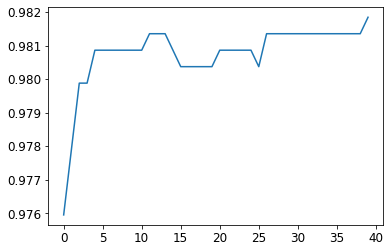

In [246]:
plt.plot(L(learn.recorder.values).itemgot(2))

In [248]:
learn.recorder.values[-1]

(#3) [0.012374524027109146,0.018867703154683113,0.981844961643219]

There is no need to stop at just two linear layers. We can add as many as we want, as long as we add a nonlinearity between each pair of linear layers. As you will learn, however, the deeper the model gets, the harder it is to optimize the parameters in practice. Later in this book you will learn about some simple but brilliantly effective techniques for training deeper models.


We already know that a single nonlinearity with two linear layers is enough to approximate any function. So why would we use deeper models? The reason is performance. With a deeper model (that is, one with more layers) we do not need to use as many parameters; it turns out that we can use smaller matrices with more layers, and get better results than we would get with larger matrices, and few layers.

That means that we can train the model more quickly, and it will take up less memory.

In [ ]:
Here is what happens when we train an 18-layer model using the same approach we saw in <>:

dls